# 第6章 回帰１：映画の興行収入の予測

映画の興行収入を予測するモデルを構築しましょう

読み込むCSVファイル  「cinema2.csv」

google colaboratoryのmatplotlibで日本語表示するために下記のセルを実行してください

参考  
https://colab.research.google.com/github/aquapathos/Semi3B/blob/master/HowToUseJapaneseOnColab.ipynb

In [ ]:
!pip install japanize-matplotlib
import japanize_matplotlib

### データを読み込む

**問1** 
matplotlibの図をセルに表示できるように設定してください

In [ ]:
%matplotlib inline

**問2**  
「cinema2.csv」を読み込み、先頭の10行を表示してください

In [ ]:
# pandasのインポート
import pandas as pd

# CSVファイルを読み込む
df = pd.read_csv('cinema2.csv')

# 変数dfの先頭10行の中身を表示する
df.head(10)

,映画ID,SNS1,SNS2,SNS3,俳優,原作有無,興行収入
0,1375,291.0,1044.0,42.0,8808.994029,0.0,9731
1,1000,363.0,568.0,78.0,10290.709370,1.0,10210
2,1390,158.0,431.0,25.0,6340.388534,1.0,8227
3,1499,261.0,578.0,74.0,8250.485081,0.0,9658
4,1164,209.0,683.0,64.0,10908.539550,0.0,9286
5,1009,250.0,866.0,60.0,9427.214520,0.0,9574
6,1417,153.0,362.0,42.0,7237.639848,1.0,7869
7,1688,473.0,856.0,65.0,8144.455961,1.0,9804
8,1503,117.0,114.0,95.0,8843.854509,1.0,9023
9,1851,293.0,463.0,NaN,8244.455961,1.0,9229


▶実行結果

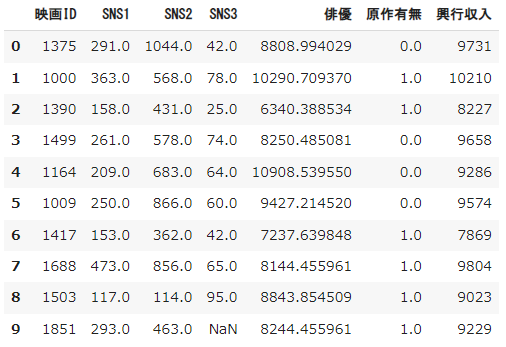

**問3**  
読み込んだデータの行数、列数を表示してください

In [ ]:
df.shape

(100, 7)

▶実行結果

(100, 7)

### 欠損値の対処

**問4**  
各列の欠損値の有無をTrue/Falseで表示してください

In [ ]:
# df.isnull().any(axis = 0)
df.isnull().any()

映画ID    False
SNS1     True
SNS2     True
SNS3     True
俳優      False
原作有無     True
興行収入    False
dtype: bool

▶実行結果

映画ID    False  
SNS1     True  
SNS2     True  
SNS3     True  
俳優      False  
原作有無     True  
興行収入    False  
dtype: bool

**問5**  
いずれかの列に欠損値がある行のデータだけを表示してください

In [ ]:
# 欠損値のある行かどうか(True/False)を取得し、変数series_nan_anyに代入する
series_nan_any = df[df.isnull().any(axis=1)]

# dfに上記True/Falseのシリーズを渡し、Trueの行のデータだけを表示する
df[series_nan_any]

,映画ID,SNS1,SNS2,SNS3,俳優,原作有無,興行収入
9,1851,293.0,463.0,NaN,8244.455961,1.0,9229
13,1737,609.0,NaN,33.0,8411.145486,1.0,10024
35,1594,NaN,948.0,95.0,10187.275740,1.0,10178
44,1550,304.0,292.0,76.0,9991.717888,NaN,9824



▶実行結果

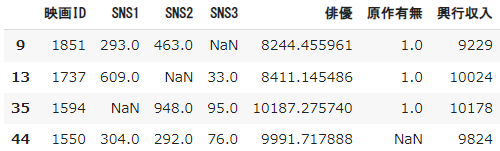

**問6**  
「原作有無」列が欠損値の行を削除してください。  
削除後データの行数、列数を表示し、行が減っていることを確認してください。

In [ ]:
# 該当行のindexを取得する
target_indexes = df[df['原作有無'].isnull()].index

# target_indexes

# dfから該当行を削除し、再度dfに代入しなおす
df = df.drop(target_indexes, axis = 0)

# 削除後データの行数、列数を表示する
df.shape

(99, 7)

▶実行結果  
(99, 7)

**問7**  
dfの残りの欠損値を各列の平均値で補完し、補完した結果をdf_fillnaに代入してください

In [ ]:
# 欠損値を平均値で補完して、df_fillnaに代入
df_fillna = df.fillna(df.mean())

print('==欠損値があった行==')
# 欠損していた位置の値を表示し、欠損値が置き換えられていることを確認する
# print(df_fillna[series_nan_any])
print(df_fillna.loc[[1, 9, 13, 35], :])

print('==各列の欠損値の有無==')
# 各列の欠損値の有無をTrue/Falseで表示し、欠損値がないことを確認する
print(df_fillna.isnull().any())

==欠損値があった行==
    映画ID        SNS1        SNS2       SNS3            俳優  原作有無   興行収入
1   1000  363.000000  568.000000  78.000000  10290.709370   1.0  10210
9   1851  293.000000  463.000000  59.704082   8244.455961   1.0   9229
13  1737  609.000000  662.265306  33.000000   8411.145486   1.0  10024
35  1594  372.683673  948.000000  95.000000  10187.275740   1.0  10178
==各列の欠損値の有無==
映画ID    False
SNS1    False
SNS2    False
SNS3    False
俳優      False
原作有無    False
興行収入    False
dtype: bool


▶実行結果

==欠損値があった行==  
    映画ID        SNS1        SNS2       SNS3            俳優  原作有無   興行収入  
9   1851  293.000000  463.000000  59.704082   8244.455961   1.0   9229  
13  1737  609.000000  662.265306  33.000000   8411.145486   1.0  10024  
35  1594  372.683673  948.000000  95.000000  10187.275740   1.0  10178  
==各列の欠損値の有無==  
映画ID    False  
SNS1    False  
SNS2    False  
SNS3    False  
俳優      False  
原作有無    False  
興行収入    False  
dtype: bool

### 外れ値の確認

興行収入との散布図を表示し外れ値を探します。

**問8**  
for文を使い、df_fillnaに含まれている各列と「興行収入」列の散布図を作成してください

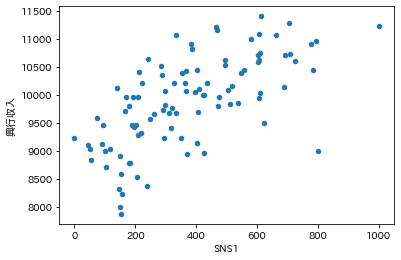

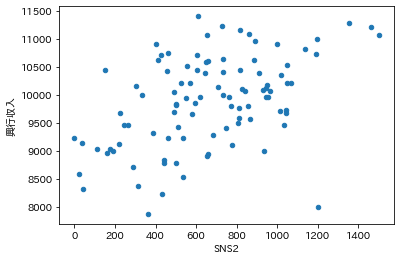

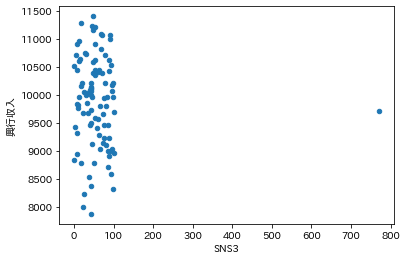

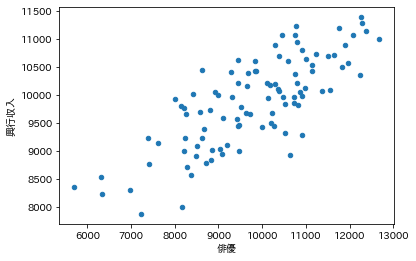

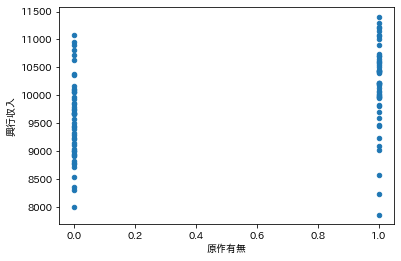

In [ ]:
# データフレームのカラム名ごとにループする
for name in df.columns:
    # 「映画ID」列と「興行収入」列の散布図、「興行収入」列同士の散布図は作らない
    if name == '映画ID' or name == '興行収入':
      continue

    # 散布図を表示する
    df_fillna.plot(kind = 'scatter', x = name, y = '興行収入')

▶実行結果

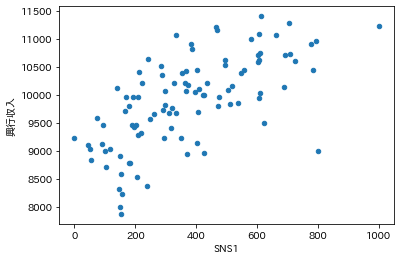

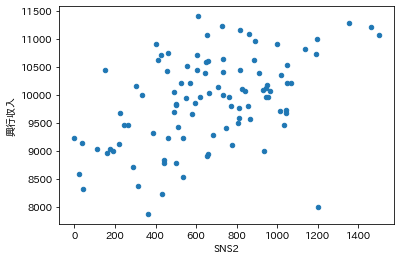

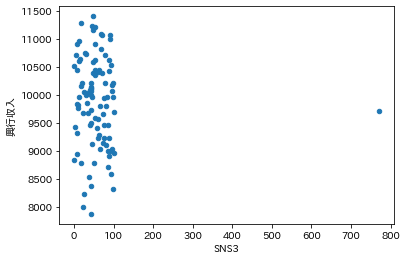

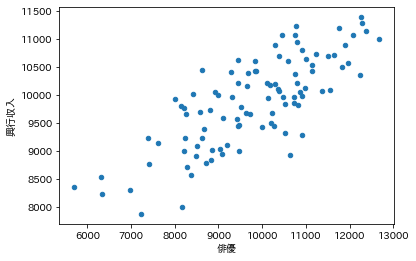

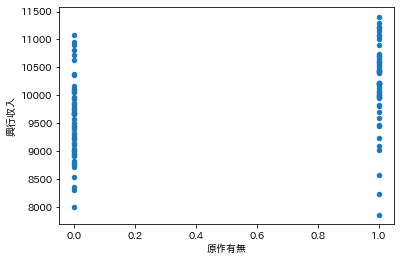

**問9**  
SNS2と興行収入の散布図で以下を外れ値とし、該当データを削除してください  
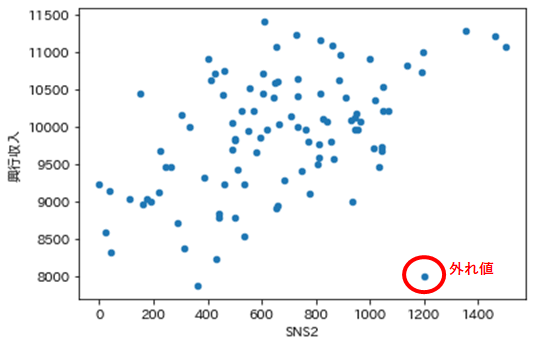

In [ ]:
# df_fillnaから、SNS2の外れ値のインデックスを取得し、noに代入する
no = df_fillna[(df_fillna['SNS2'] >= 1200) & (df_fillna['興行収入'] < 8500 )].index

# df_fillnaからインデックス指定で該当データを削除し、df_preprocessedに代入する
df_preprocessed = df_fillna.drop(no, axis = 0)

# df_preprocessedの行数、列数を表示し、データが削除されていることを確認する
df_preprocessed.shape

(98, 7)

▶実行結果

(98, 7)

**問10**  
SNS3と興行収入の散布図で外れ値を探し、該当データを削除してください

In [ ]:
# df_preprocessedから、SNS3の外れ値のインデックスを取得し、noに代入する
no = df_preprocessed[(df_preprocessed['SNS3'] > 700) & (df_preprocessed['興行収入'] > 9500)].index

# df_preprocessedからインデックス指定で該当データを削除し、df_preprocessedに代入しなおす
df_preprocessed = df_preprocessed.drop(no, axis = 0)

# df_preprocessedの行数、列数を表示し、データが削除されていることを確認する
df_preprocessed.shape

(97, 7)

▶実行結果

(97, 7)

### 特徴量と正解データに分割する

特徴量と正解データを以下の列とする
* 特徴量　…　「SNS1」「SNS2」「SNS3」「俳優」「原作有無」
* 正解データ　…　「興行収入」

**問11**  
df_preprocessedから特徴量だけを取り出して変数Xに代入してください

In [ ]:
# 特徴量をXに代入し、先頭数行を表示する
# X = df_preprocessed.loc[ : , 'SNS1':'原作有無']
X = df_preprocessed.loc[:, ['SNS1', 'SNS2', 'SNS3', '俳優', '原作有無']]
X.head()

,SNS1,SNS2,SNS3,俳優,原作有無
0,291.0,1044.0,42.0,8808.994029,0.0
1,363.0,568.0,78.0,10290.709370,1.0
2,158.0,431.0,25.0,6340.388534,1.0
3,261.0,578.0,74.0,8250.485081,0.0
4,209.0,683.0,64.0,10908.539550,0.0


▶実行結果

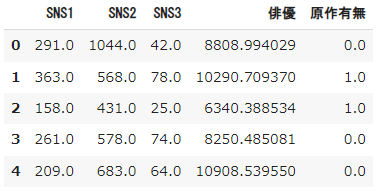

**問12**  
df_preprocessedから正解データだけを取り出して変数yに代入してください

In [ ]:
# 正解データをyに代入し、先頭数行を表示する
y = df_preprocessed['興行収入']
y.head()

0     9731
1    10210
2     8227
3     9658
4     9286
Name: 興行収入, dtype: int64

▶実行結果

0     9731  
1    10210  
2     8227  
3     9658  
4     9286  
Name: 興行収入, dtype: int64

### ホールドアウト法で訓練データ、テストデータに分割する

**問13**  
X、yを訓練データ、テストデータに分割してください。  
* テストデータに使用する割合を20%、乱数シードは0とする
* 訓練データの特徴量を格納する変数名はX_trainとする
* テストデータの特徴量を格納する変数名はX_testとする
* 訓練データの正解データを格納する変数名はy_trainとする
* テストデータの正解データを格納する変数名はy_testとする

また、分割前のXの行数・列数、分割後のX_train、X_testの行数・列数を表示してください。

In [ ]:
# train_test_splitをインポートする
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('X:{}'.format(X.shape))
print('X_train:{}'.format(X_train.shape))
print('X_test:{}'.format(X_test.shape))

X:(97, 5)
X_train:(77, 5)
X_test:(20, 5)


▶実行結果  
X: (97, 5)  
X_train: (77, 5)  
X_test: (20, 5)

### 学習と評価

**問14**  
訓練データでモデルを学習させてください。  
また、訓練データでの決定係数を求めてください

In [ ]:
# LinerRegression関数をインポートする
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7657435175471607

▶実行結果

0.7657435175471607

**問15**  
テストデータで決定係数を求めてください

In [ ]:
model.score(X_test, y_test)

0.7135006774145485

▶実行結果

0.7135006774145485

### 新たなデータで予測する

**問16**  
以下の表のデータで予測し、結果を表示してください

|SNS1|SNS2|SNS3|俳優|原作有無|
| ----: | ----: | ----: | ----: | ----: |
|150|700|300|50|0|
|150|700|300|50|1|

In [ ]:
data = [[150, 700, 300, 50, 0], [150, 700, 300, 50, 1]]
model.predict(data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([6955.38169671, 7135.24930894])

▶実行結果

array([6955.38169671, 7135.24930894])

### 回帰式の影響度を確認する

**問17**  
回帰式の係数、切片を表示してください

In [ ]:
print('係数')
# 計算式の係数を表示する
print(model.coef_)

print('切片')
# 計算式の切片の表示
print(model.intercept_)

係数
[  1.16498601   0.43035128   0.71431744   0.28988172 179.86761223]
切片
6250.598579882508


▶実行結果

係数  
[  1.16498601   0.43035128   0.71431744   0.28988172 179.86761223]  
切片  
6250.598579882508

### モデルの保存

**問18**  
学習済みモデルを「chapter06_model.pkl」という名前で保存してください

In [ ]:
# pickleをインポート
import pickle

# 'chapter06_model.pkl'という名前でモデルを保存する
with open('chapter06_model.pkl', 'wb') as f:
  pickle.dump(model, f)